## Modeling

In [30]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import sys

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [12]:
sys.version

'3.8.11 (default, Aug  6 2021, 09:57:55) [MSC v.1916 64 bit (AMD64)]'

In [13]:
from tensorflow.python.client import device_lib

device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 2503600528935071428
 xla_global_id: -1]

추후 로컬 gpu 사용하는 방법 연구

In [14]:
path = f'C:/Users/sanghui/Desktop/toyproject/DL_Project_5/hsh/data/crop_resize/train/2'

max = len(os.listdir(f'{path}/11'))

for category_id in os.listdir(path):
    if len(os.listdir(f'{path}/{category_id}')) >= max:
        max_category_id = category_id

max_category_id, len(os.listdir(f'{path}/{max_category_id}'))

('39', 3134)

- 의류 카테고리중 상품수 가장 많은 파일만일단 학습 시작
- 목적 : 해당 카테고리내 샘플링 된 상품수로 클러스터링이 가능한지 확인하기 위해

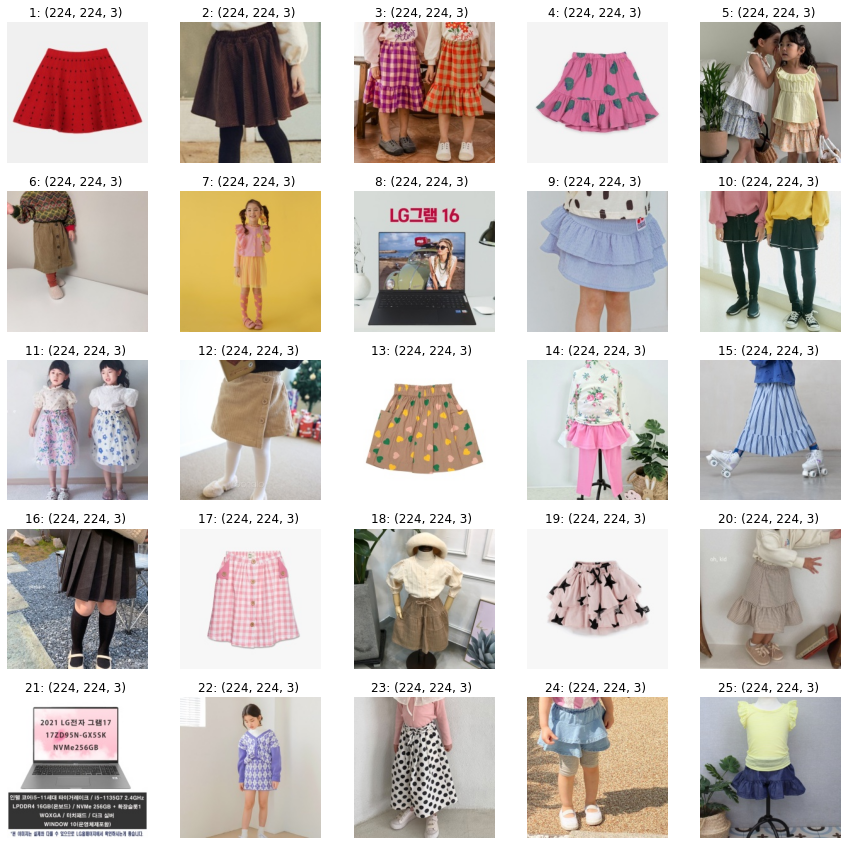

In [29]:
max_path = f'C:/Users/sanghui/Desktop/toyproject/DL_Project_5/hsh/data/crop_resize/train/2/{max_category_id}'

plt.figure(figsize=(15, 15))
for i, file in enumerate(os.listdir(max_path)[:25]):
    img_path = max_path + '/' + file
    src = cv2.imread(img_path, cv2.IMREAD_COLOR)
    src = cv2.cvtColor(src, cv2.COLOR_BGR2RGB)

    plt.subplot(5, 5, i + 1)
    plt.imshow(src)
    plt.title(f'{i+1}: {src.shape} ')
    plt.axis('off')
plt.show()

In [32]:
train_datagen = ImageDataGenerator(
    zoom_range=[0.5, 0.7], # 이미지 줌
    brightness_range=[0.2, 0.5] # 이미지 밝기
)

test_datagen = ImageDataGenerator(
    zoom_range=[0.5, 0.7],
    brightness_range=[0.2, 0.5]
)

In [ ]:
train_generator = train_datagen.flow_from_directory(max_path, target_size=())